In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv(r"data/data.csv",index_col = 0)
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [5]:
#删除缺失值过多的列，和观察判断来说和预测的y没有关系的列
data.drop(["Cabin","Name","Ticket"],inplace=True,axis=1)

#处理缺失值，对缺失值较多的列进行填补，有一些特征只确实一两个值，可以采取直接删除记录的方法
data["Age"] = data["Age"].fillna(data["Age"].mean())
data = data.dropna()

#将分类变量转换为数值型变量

#将二分类变量转换为数值型变量
#astype能够将一个pandas对象转换为某种类型，和apply(int(x))不同，astype可以将文本类转换为数字，用这个方式可以很便捷地将二分类特征转换为0~1
data["Sex"] = (data["Sex"]== "male").astype("int")

#将三分类变量转换为数值型变量
labels = data["Embarked"].unique().tolist()
data["Embarked"] = data["Embarked"].apply(lambda x: labels.index(x))

#查看处理后的数据集
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,0
2,1,1,0,38.0,1,0,71.2833,1
3,1,3,0,26.0,0,0,7.9250,0
4,1,1,0,35.0,1,0,53.1000,0
5,0,3,1,35.0,0,0,8.0500,0


In [6]:
X = data.iloc[:,data.columns != "Survived"]
y = data.iloc[:,data.columns == "Survived"]

In [7]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.3)

#修正测试集和训练集的索引
for i in [Xtrain, Xtest, Ytrain, Ytest]:
    i.index = range(i.shape[0])
    
#查看分好的训练集和测试集
Xtrain.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,1,45.0,0,0,26.5500,0
1,3,0,18.0,0,0,7.4958,0
2,1,1,70.0,1,1,71.0000,0
3,3,0,16.0,0,0,7.7500,2
4,3,1,19.0,0,0,7.8958,0


In [8]:
clf = DecisionTreeClassifier(random_state=25)
clf = clf.fit(Xtrain, Ytrain)
score_ = clf.score(Xtest, Ytest)

score_

0.7827715355805244

In [9]:
score = cross_val_score(clf,X,y,cv=10).mean()

score

0.7739274770173645

0.8177860061287026


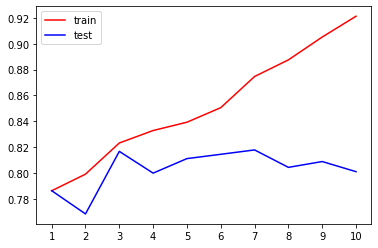

In [10]:
tr = []
te = []
for i in range(10):
    clf = DecisionTreeClassifier(random_state=25
                                 ,max_depth=i+1
                                 ,criterion="entropy"
                                )
    clf = clf.fit(Xtrain, Ytrain)
    score_tr = clf.score(Xtrain,Ytrain)
    score_te = cross_val_score(clf,X,y,cv=10).mean()
    tr.append(score_tr)
    te.append(score_te)
print(max(te))
plt.plot(range(1,11),tr,color="red",label="train")
plt.plot(range(1,11),te,color="blue",label="test")
plt.xticks(range(1,11))
plt.legend()
plt.show()

In [11]:
import numpy as np
gini_thresholds = np.linspace(0,0.5,20)

parameters = {'splitter':('best','random')
              ,'criterion':("gini","entropy")
              ,"max_depth":[*range(1,10)]
              ,'min_samples_leaf':[*range(1,50,5)]
              ,'min_impurity_decrease':[*np.linspace(0,0.5,20)]
             }

clf = DecisionTreeClassifier(random_state=25)
GS = GridSearchCV(clf, parameters, cv=10)
GS.fit(Xtrain,Ytrain)

GS.best_params_

GS.best_score_

0.8215434083601286